In [28]:
# Alle Variablen löschen ohne zu fragen.
# Hierdurch werden Seiteneffekte vermieden.
%reset -f

In [29]:
%matplotlib notebook

# Laden der verwendeten Bibliotheken
from PIL import Image
import   numpy  as np               
import   scipy 
import   matplotlib                 # https://matplotlib.org/3.1.1/tutorials/index.html
import   matplotlib.pyplot as plt   # https://matplotlib.org/tutorials/introductory/pyplot.html
import   time

In [30]:
# Bild laden mit PIL und Konvertierung in ein Grauwertbild
img = Image.open("kalib.bmp").convert("L")

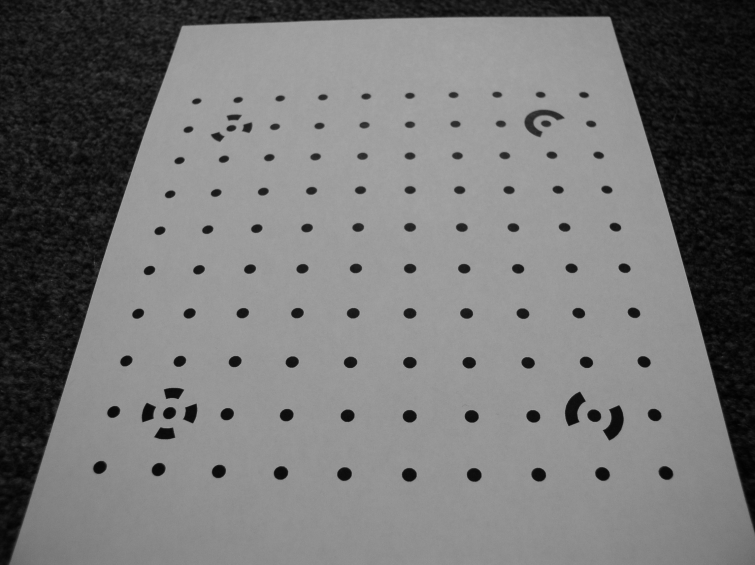

In [31]:
# PIL-Image darstellen
img

In [32]:
# Informationen über PIL-Image
print('format =', img.format)
print('info   =', img.info)
print()
print('size   =', img.size,)
print('mode   =', img.mode)  # 'L' = 8-bit-unsigned

format = None
info   = {'dpi': (72, 72), 'compression': 0}

size   = (755, 565)
mode   = L


In [33]:
# PIL-Image in ein numpy-Array umwandeln
src = np.array(img)
print('src=',src)
print()
# Informationen über numpy-Array
print('shape =', src.shape)
print('type  =', src.dtype)
print('min   =', src.min())
print('max   =', src.max())

src= [[ 19  25  23 ...  12  11  11]
 [ 17  19  20 ...  11  11  10]
 [ 21  18  18 ...  14  14  12]
 ...
 [ 18  18  17 ... 108 107 107]
 [ 21  20  18 ... 106 109 108]
 [ 21  20  18 ... 107 110 108]]

shape = (565, 755)
type  = uint8
min   = 1
max   = 166


In [34]:
def outsideImage(coordinate, maxsize):
    isOutside = False;
    
    if (coordinate < 0 or coordinate > maxsize):
        isOutside = True;

    return isOutside

def bilinInterpol(Xtilde, Ytilde, src):
    xfloor = np.int(np.floor(Xtilde))
    yfloor = np.int(np.floor(Ytilde))
    
    xrint = xfloor + 1
    yrint = yfloor + 1
    
    # Alle Bildpunkte
    x1 = np.int64(src[yfloor][xfloor])
    x2 = np.int64(src[yfloor][xrint])
    x3 = np.int64(src[yrint][xfloor])
    x4 = np.int64(src[yrint][xrint])
    
    # interpolierten Grauwert berechnen
    fx1 = x1 + (Xtilde - xfloor) * (x2 - x1)
    fx2 = x3 + (Xtilde - xfloor) * (x4 - x3)   
    interpolatedValue = fx1 + (Ytilde - yfloor) * (fx2 - fx1)
   
    return interpolatedValue


# a = [(a0, a1, a2), (b0, b1, b2)]
def AffineTransformation(src, a, method=0):
    
    # Zielbild anlegen
    dst = np.copy(src)

    # Größe des Quellbildes bestimmen
    ysize = src.shape[0]
    xsize = src.shape[1]
    
    for y in range(0, ysize):
        for x in range(0, xsize):
            xq = a[0][0] + a[0][1] * x + a[0][2] * y;
            yq = a[1][0] + a[1][1] * x + a[1][2] * y;
            
            if(outsideImage(xq, xsize) or outsideImage(yq, ysize)):
                dst[y][x] = 0                
            elif (method == 1):
                interpolatedValue = bilinInterpol(xq, yq, src)
                
                # Quellbildpunkt übertragen
                dst[y][x] = interpolatedValue
            else:
                # Kaufmännisch runden
                xq += 0.5
                yq += 0.5
                xq = np.int(xq)
                yq = np.int(yq)
                
                # Quellbildpunkt übertragen
                dst[y][x] = src[yq][xq]
    return dst

In [35]:
# Koeffizienten-Array Coeff anlegen ...


start = time.time()
Coeff = [(160.7917, 0.4417, -0.13), (218.7417, 0.00167, 0.4925)]
# Affine Transformation aufrufen
Transformed = AffineTransformation(src, Coeff, method=0)
#Transformed = AffineTransformation(src, Coeff, method=1)

ende   = time.time()
print('Runtime   = {:5.3f}s'.format(ende-start))

Runtime   = 0.852s


<IPython.core.display.Javascript object>


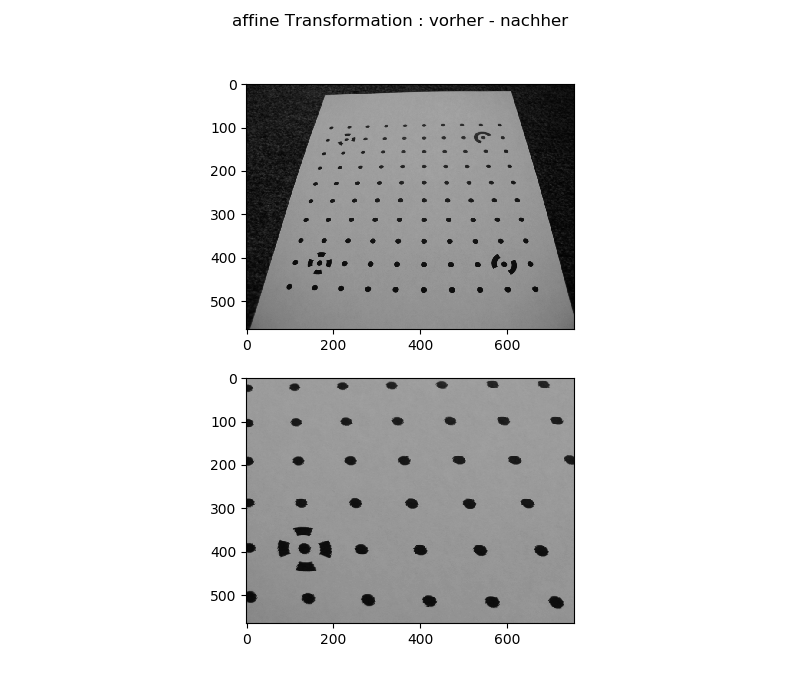

min/max = 8 162
shape   = (565, 755)
dtype   = uint8


In [27]:
plt.figure(figsize = (8,7))

plt.subplot(211)
plt.imshow(src, cmap='gray', vmin=0, vmax=255)
plt.subplot(212)
plt.imshow(Transformed, cmap='gray', vmin=0, vmax=255)
plt.suptitle('affine Transformation : vorher - nachher')
plt.show()

#plt.imshow(Transformed, cmap='gray', vmin=0, vmax=255)
#plt.title('affine Transformation')
#plt.show()

# Informationen zum Bild
print('min/max =', Transformed.min(), Transformed.max())
print('shape   =', Transformed.shape)
print('dtype   =', Transformed.dtype)

In [10]:
# Liste der Variablen ausgeben
%whos    

Variable               Type        Data/Info
--------------------------------------------
AffineTransformation   function    <function AffineTransform<...>on at 0x000001BDC944EB88>
Coeff                  ndarray     2x3: 6 elems, type `float64`, 48 bytes
Image                  module      <module 'PIL.Image' from <...>packages\\PIL\\Image.py'>
Transformed            ndarray     565x755: 426575 elems, type `uint8`, 426575 bytes (416.5771484375 kb)
bilinInterpol          function    <function bilinInterpol at 0x000001BDC944EA68>
ende                   float       1587992660.5489044
img                    Image       <PIL.Image.Image image mo<...>755x565 at 0x1BDC8D1AB48>
matplotlib             module      <module 'matplotlib' from<...>matplotlib\\__init__.py'>
np                     module      <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
outsideImage           function    <function outsideImage at 0x000001BDC944EE58>
plt                    module      <module 'matplotlib.pypl